In [224]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn import preprocessing as pre

import csv
import plotly.graph_objects as go
import plotly.express as px
import statistics
from scipy import stats

from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%run svr_hosp_func.ipynb

In [168]:
weekly_data=pd.read_csv('~/Desktop/thesis code/thesis/weekly_data.csv',parse_dates=['week'])
daily_data=pd.read_csv('~/Desktop/thesis code/thesis/daily_all_data.csv', parse_dates=['date'])

In [169]:
# use week dates as index number
weekly_data.index = weekly_data['week']
weekly_data = weekly_data.drop(['week'], axis=1)
weekly_data=weekly_data[['stringency_index','temp', 'windspeed', 'new_cases','new_deaths', 'icu_patients', 'hosp_patients','reproduction_rate', 'case_fatality', 'precip', 'humidity' ]]
weekly_data.humidity=weekly_data.humidity/100
weekly_data

,stringency_index,temp,windspeed,new_cases,new_deaths,icu_patients,hosp_patients,reproduction_rate,case_fatality,precip,humidity
week,,,,,,,,,,,
2020-03-30,78.70,7.780000,25.920000,5208.00,731.0,6478.0,13123.0,0.141015,0.140361,0.329800,0.676400
2020-04-06,78.70,12.671429,19.157143,7773.00,976.0,9791.0,19114.0,0.128903,0.125563,0.152714,0.639429
2020-04-13,78.70,9.585714,24.142857,6871.00,948.0,8790.0,16239.0,0.137014,0.137971,0.069429,0.647000
2020-04-20,78.70,12.314286,25.985714,4847.00,794.0,7159.0,13462.0,0.165101,0.163813,0.000000,0.558286
2020-04-27,78.70,10.642857,26.528571,2527.00,581.0,5484.0,10583.0,0.240214,0.229917,2.716429,0.795429
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,11.11,11.685714,29.442857,33639.00,36.0,288.0,6355.0,0.001105,0.001070,2.516571,0.838000
2022-11-07,11.11,11.171429,26.842857,23442.00,25.0,262.0,5174.0,0.001068,0.001066,3.349286,0.862857
2022-11-14,11.11,6.557143,26.114286,19641.25,22.0,228.0,4506.0,0.001102,0.001120,3.822571,0.889286


In [170]:
daily_data.index = daily_data['date']
daily_data =daily_data.drop(['date'], axis=1)
daily_data=daily_data[['stringency_index','temp', 'windspeed', 'new_cases','new_deaths', 'icu_patients', 'hosp_patients','reproduction_rate', 'case_fatality', 'precip', 'humidity' ]]
daily_data.humidity=daily_data.humidity/100
daily_data

,stringency_index,temp,windspeed,new_cases,new_deaths,icu_patients,hosp_patients,reproduction_rate,case_fatality,precip,humidity
date,,,,,,,,,,,
2020-04-01,78.70,3.8,17.2,1093.00,135.0,1208.000000,2945.0,0.123513,0.123513,0.000,0.764
2020-04-02,78.70,7.4,33.8,1028.00,166.0,1249.000000,2807.0,0.161479,0.161479,0.115,0.762
2020-04-03,78.70,7.0,26.7,909.00,149.0,1276.000000,2531.0,0.163916,0.163916,1.534,0.773
2020-04-04,78.70,8.2,21.0,1224.00,166.0,1360.000000,2570.0,0.135621,0.135621,0.000,0.598
2020-04-05,78.70,12.5,30.9,954.00,115.0,1385.000000,2270.0,0.120545,0.120545,0.000,0.485
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-26,11.11,7.3,21.6,2510.25,0.0,32.333333,583.0,0.000000,0.000000,0.000,0.936
2022-11-27,11.11,6.7,24.6,2573.50,0.0,32.666667,585.0,0.000000,0.000000,1.120,0.918
2022-11-28,11.11,8.5,17.2,2636.75,0.0,33.000000,587.0,0.000000,0.000000,9.841,0.981


In [171]:
weekly_hosp=XY_hosp(weekly_data)
daily_hosp=XY_hosp(daily_data)

In [172]:
#X_week=weekly_hosp.drop(['hosp_patients_shift'], axis=1)
X_week=weekly_hosp.drop(['hosp_patients_shift'], axis=1)
Y_week=pd.DataFrame(weekly_hosp['hosp_patients_shift'])

X_day=daily_hosp.drop(['hosp_patients_shift'], axis=1)
Y_day=pd.DataFrame(daily_hosp['hosp_patients_shift'])

In [173]:
Y_day

,hosp_patients_shift
date,
2020-04-01,2945.0
2020-04-02,2807.0
2020-04-03,2531.0
2020-04-04,2570.0
2020-04-05,2270.0
...,...
2022-11-26,583.0
2022-11-27,585.0
2022-11-28,587.0


In [174]:
X_weekinput=X_week.iloc[0:X_week.shape[0]-4,]
Y_weekinput=Y_week.iloc[0:Y_week.shape[0]-1,]


X_dayinput=X_day.iloc[0:X_day.shape[0]-4,]
Y_dayinput=Y_day.iloc[0:Y_day.shape[0]-1,]

In [176]:
Y_dayinput

,hosp_patients_shift
date,
2020-04-01,2945.0
2020-04-02,2807.0
2020-04-03,2531.0
2020-04-04,2570.0
2020-04-05,2270.0
...,...
2022-11-25,581.0
2022-11-26,583.0
2022-11-27,585.0


In [177]:
X_weekinput

,stringency_index,temp,windspeed,new_cases,new_deaths,icu_patients,hosp_patients,reproduction_rate,case_fatality,precip,humidity
week,,,,,,,,,,,
2020-03-30,78.70,7.780000,25.920000,5208.00,731.0,6478.0,13123.0,0.141015,0.140361,0.329800,0.676400
2020-04-06,78.70,12.671429,19.157143,7773.00,976.0,9791.0,19114.0,0.128903,0.125563,0.152714,0.639429
2020-04-13,78.70,9.585714,24.142857,6871.00,948.0,8790.0,16239.0,0.137014,0.137971,0.069429,0.647000
2020-04-20,78.70,12.314286,25.985714,4847.00,794.0,7159.0,13462.0,0.165101,0.163813,0.000000,0.558286
2020-04-27,78.70,10.642857,26.528571,2527.00,581.0,5484.0,10583.0,0.240214,0.229917,2.716429,0.795429
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-03,11.11,13.257143,26.871429,77740.00,42.0,280.0,6371.0,0.000534,0.000540,0.325571,0.787000
2022-10-10,11.11,11.900000,21.142857,80720.50,29.0,307.0,7677.0,0.000364,0.000359,1.962286,0.863143
2022-10-17,11.11,13.357143,21.285714,65489.75,50.0,392.0,8014.0,0.000801,0.000763,1.043429,0.887571


In [178]:
# need to transform the 26 weeks into 6 week per set
def create_sw(X_train,Y_train, train_size, model_inputsize,var_num, list1, list2, kernel, c, eps, gamma, test_size):
 
    
    X_SVR = []
    Y_SVR =[]
    #print(len(X_train))
    for i in range(train_size):
        xset=X_train[i*var_num:i*var_num+var_num*model_inputsize]
        X_SVR.append(xset)
    
    for j in range(train_size):
        yset=Y_train[j:j+4]
       # print(yset)
        Y_SVR.append(yset.ravel())
        #print(yset.ravel())
    Y_SVR=np.array(Y_SVR)
    
    X_SVRtrain=X_SVR[0:train_size-1]
    X_SVRtest=[X_SVR[train_size-1]]
    Y_SVRtrain=Y_SVR[0:train_size-1]
    Y_SVRtest=[Y_SVR[train_size- 1]]
    #print(X_SVRtest)
    #print(Y_SVRtrain)
    
    test_predictions=swsvr( kernel,c,eps,gamma,X_SVRtrain, Y_SVRtrain, X_SVRtest,  test_size)
    return test_predictions



In [179]:
def swsvr( kernel, C_best, eps_best, gamma_best, X_SVRtrain, Y_SVRtrain, X_SVRtest,  Xtest_size):
    svr = MultiOutputRegressor(SVR(kernel=kernel, C=C_best,epsilon=eps_best, gamma=gamma_best))
    #print(Y_SVRtrain)
    #print(X_SVRtrain)
    #print(len(Y_SVRtrain))
    svr.fit(X_SVRtrain,Y_SVRtrain)

    predictions = []
    for i in range(Xtest_size):
        y_pred = svr.predict(X_SVRtest[i].reshape(1,-1))
        predictions.append(y_pred)
    predictions=np.array(predictions).reshape(-1,1)
    return predictions #, contribution_score



In [180]:
def traininng_sliding_window(scaler,Xt,Yt, train_size, model_inputsize,forecast_steps, list1, list2, num_var,kernel,C, eps, gamma, X_testsize):

    X = []
    Y = []
    ymean=[]
    predictions=[]
    for i in range(Xt.shape[0]-train_size-model_inputsize+1):
        sc_X=scaler.fit_transform(Xt.iloc[i:i+ train_size+model_inputsize-1,0].values.reshape(-1,1))

        for j in range(len(list1)):
            sc=scaler.fit_transform(Xt.iloc[i:i + train_size+model_inputsize-1,j+1].values.reshape(-1,1))
            sc_X=np.concatenate((sc_X, sc), axis=1)
        
        for k in range(len(list2)):
            sc_X=np.concatenate((sc_X, Xt.iloc[i:i + train_size+model_inputsize-1,k+len(list1)+1].values.reshape(-1,1)), axis=1)
        X.append(sc_X.flatten())
        #print(len(sc_X.flatten()))
        y=Yt.iloc[(i+model_inputsize-1):(i+train_size+model_inputsize+forecast_steps-1-1), 0]
        #print(y)
        ymean=y.mean()
        ysd=y.std()
        y_sc=scaler.fit_transform(y.values.reshape(-1,1))
        Y.append(y_sc)
        #print(sc_X.flatten())
        #print(len(sc_X.flatten()))
   # for i in range(len(X)):
        pred=create_sw(sc_X.flatten(),y_sc,train_size,model_inputsize,num_var, list1, list2, kernel, C, eps, gamma,X_testsize)
        predictions_original=pred*ysd+ymean
        predictions.append(predictions_original)
 
    return predictions

In [181]:

def rmse(actual, prediction):
    rmse_value =sqrt(np.square(np.subtract(actual,prediction)).mean())
    return rmse_value

def mape(actual,prediction):
    mape_value = np.mean(np.abs((actual - prediction)/actual))
    return mape_value

def MAE(actual, prediction):
    mae_value=np.mean(np.abs(actual - predictions))
    return mae_value


# weekly

In [270]:
train_size=30
model_inputsize=2
forecast_steps=4
num_var=X_weekinput.shape[1]
kernel='rbf'
list1=['temp', 'windspeed', 'new_cases','new_deaths', 'icu_patients', 'hosp_patients' ]
list2=['reproduction_rate', 'case_fatality',  'precip', 'humidity']

scale=StandardScaler()
X_testsize=1
df_week=[]
model_predictions_week=[]
C= [1,5,10,15,20]
eps=[0.001, 0.005, 0.01, 0.03, 0.05, 0.1]
gamma=[0.001, 0.005,0.01,0.03, 0.05, 0.1]
for i in range(len(C)):
    for j in range(len(eps)):
        for k in range(len(gamma)):   
            predictions=traininng_sliding_window(scale,X_weekinput,Y_weekinput, train_size, model_inputsize,forecast_steps, list1, list2, num_var,'rbf',C[i],eps[j], gamma[k], X_testsize)
            dayt=[]
            dayt1=[]
            dayt2=[]
            dayt3=[]
            for n in range(len(predictions)):
                predictions[n]
                dayt.append(predictions[n][0][0])
                dayt1.append(predictions[n][1][0])
                dayt2.append(predictions[n][2][0])
                dayt3.append(predictions[n][3][0])
           # model_predictions_week.append(dayt)    
            #rmse_test=rmse(Y_weekinput.iloc[train_size+model_inputsize-1:-3,:].hosp_patients_shift.values,dayt)
            rmse=sqrt(mean_squared_error(Y_weekinput.iloc[train_size+model_inputsize-1:-3,:].hosp_patients_shift.values, dayt))
            r2=r2_score(Y_weekinput.iloc[train_size+model_inputsize-1:-3,:].hosp_patients_shift.values,dayt)
            mae_test=MAE(Y_weekinput.iloc[train_size+model_inputsize-1:-3,:].hosp_patients_shift.values, dayt)
            mape_test=mape(Y_weekinput.iloc[train_size+model_inputsize-1:-3,:].hosp_patients_shift.values,dayt)
            df_week.append([C[i],eps[j],gamma[k], dayt, dayt1, dayt2, dayt3,Y_weekinput.iloc[train_size+model_inputsize-1:-3,:].hosp_patients_shift.values, mape_test, rmse, mae_test, r2])
            #rmse_array.append([C[i],eps[j],gamma[k], rmse_test, mape_test])
    #mape_array.append(mape(Y_input.iloc[train_size+model_inputsize-1:-3,:].values,dayt))
    

In [266]:
table_week=pd.DataFrame(df_week)
table_week.columns=['C','epsilon','gamma,','weekt', 'weekt1','weekt2','weekt3','actual', 'mape_weekt', 'rmse','mae','R2']
table_week=table_week.sort_values(by=[ 'rmse', 'mape_weekt','mae', 'R2'],  ascending=True)
table_week.head(10)

,C,epsilon,"gamma,",weekt,weekt1,weekt2,weekt3,actual,mape_weekt,rmse,mae,R2
145,20,0.001,0.005,"[9998.436457189673, 12315.942585758992, 12827....","[13400.824795276043, 13979.529959519576, 13151...","[15941.215782063475, 13806.857238668097, 13229...","[16809.31350206298, 14476.451531682877, 11119....","[12826.0, 13188.0, 11302.0, 10289.0, 9043.0, 8...",0.177593,1309.047095,4696.490789,0.887103
151,20,0.005,0.005,"[10025.351964540383, 12296.964926919914, 12830...","[13459.207902276354, 14016.979366745505, 13172...","[15933.845989178182, 13816.864096330111, 13226...","[16709.805840231424, 14491.313340867182, 11181...","[12826.0, 13188.0, 11302.0, 10289.0, 9043.0, 8...",0.178016,1311.183799,4696.612959,0.886734
157,20,0.010,0.005,"[10030.97301350195, 12261.452266028671, 12844....","[13418.987738712542, 14040.999572302379, 13189...","[15837.88649314078, 13823.21869062808, 13228.3...","[16629.172608237317, 14456.391014679502, 11254...","[12826.0, 13188.0, 11302.0, 10289.0, 9043.0, 8...",0.178914,1317.409318,4695.642197,0.885656
115,15,0.005,0.005,"[9894.280909666686, 12245.78735131297, 12725.8...","[13170.991201241068, 13958.80105810659, 13076....","[15473.043067427541, 13918.2964565677, 13198.3...","[16083.280784945175, 12869.23112305428, 10994....","[12826.0, 13188.0, 11302.0, 10289.0, 9043.0, 8...",0.179665,1322.874391,4662.889884,0.884705
163,20,0.030,0.005,"[10157.817336646272, 12070.455324006853, 12745...","[13228.106351495997, 14046.003139949808, 13216...","[15645.289772978453, 13986.508779292228, 13117...","[16463.499454662142, 14118.305895285743, 11576...","[12826.0, 13188.0, 11302.0, 10289.0, 9043.0, 8...",0.181441,1326.457740,4694.516224,0.884080
109,15,0.001,0.005,"[9862.56807729592, 12273.29380500084, 12730.92...","[13183.883273577525, 13998.52859103644, 13102....","[15511.249074105239, 13890.533361520585, 13212...","[16014.113410196307, 12902.824081677118, 10974...","[12826.0, 13188.0, 11302.0, 10289.0, 9043.0, 8...",0.180025,1326.679722,4663.143069,0.884041
121,15,0.010,0.005,"[9905.123190616787, 12216.197986804113, 12734....","[13121.752644327651, 13926.994707445087, 13112...","[15428.967209205108, 13954.036906392219, 13166...","[16114.616172924925, 12843.107685858562, 11024...","[12826.0, 13188.0, 11302.0, 10289.0, 9043.0, 8...",0.180571,1327.866846,4663.694864,0.883833
127,15,0.030,0.005,"[9937.691373323281, 12053.17294947774, 12701.4...","[13021.480345599846, 13769.537584162728, 13169...","[15214.700565145493, 14045.067780235731, 13161...","[16127.837986726448, 12720.802445083405, 11177...","[12826.0, 13188.0, 11302.0, 10289.0, 9043.0, 8...",0.182443,1343.817536,4661.811054,0.881026
169,20,0.050,0.005,"[10151.234555522777, 11866.373864460853, 12618...","[13374.849889278987, 13701.400382077063, 13306...","[15722.472095058834, 14159.818953688435, 13015...","[16328.062501655728, 13486.058290227735, 11807...","[12826.0, 13188.0, 11302.0, 10289.0, 9043.0, 8...",0.183283,1353.561718,4695.122684,0.879294
85,10,0.010,0.005,"[9760.977639506615, 12012.864309299326, 12616....","[12746.643920742863, 13952.865177086434, 13044...","[14798.81165976444, 14120.83627847195, 13010.7...","[15352.470448088505, 12210.430398501776, 10875...","[12826.0, 13188.0, 11302.0, 10289.0, 9043.0, 8...",0.184685,1363.132798,4615.863969,0.877581


In [271]:
table_week2=pd.DataFrame(df_week)
table_week2.columns=['C','epsilon','gamma,','weekt', 'weekt1','weekt2','weekt3','actual', 'mape_weekt', 'rmse','mae','R2']
table_week2=table_week2.sort_values(by=['mape_weekt', 'rmse', 'mae', 'R2'],  ascending=True)
table_week2.head(2)

,C,epsilon,"gamma,",weekt,weekt1,weekt2,weekt3,actual,mape_weekt,rmse,mae,R2
145,20,0.001,0.005,"[11807.784781652073, 13373.541811166537, 12076...","[14186.433264736395, 13182.322063748612, 11387...","[14401.826600422606, 10946.282223852326, 10450...","[13388.464144750644, 9322.26853219398, 8546.05...","[13188.0, 11302.0, 10289.0, 9043.0, 8167.0, 85...",0.198686,1420.714103,4650.506473,0.865853
151,20,0.005,0.005,"[11724.938028751028, 13341.270597015211, 12103...","[14221.976249689807, 13217.7070301472, 11381.0...","[14395.208655703096, 10985.523941415026, 10462...","[13360.288142732017, 9336.225959072552, 8563.9...","[13188.0, 11302.0, 10289.0, 9043.0, 8167.0, 85...",0.201313,1425.260792,4652.157722,0.864993


In [53]:
table_week3=pd.DataFrame(df_week)
table_week3.columns=['C','epsilon','gamma,','weekt', 'weekt1','weekt2','weekt3','actual', 'mape_weekt', 'rmse','mae','R2']
table_week3=table_week3.sort_values(by=['mape_weekt', 'rmse', 'mae', 'R2'],  ascending=True)
table_week3.head(2)

,C,epsilon,"gamma,",weekt,weekt1,weekt2,weekt3,actual,mape_weekt,rmse,mae,R2
144,20,0.001,0.001,"[2715.9374628482187, 2865.3561691160367, 2923....","[2299.9517209994056, 2424.3748432713646, 2634....","[2662.690920531617, 2581.353309063417, 3301.08...","[3089.656399561571, 2957.33239491727, 3106.007...","[3245.0, 3077.0, 3154.0, 3156.0, 2755.0, 2338....",0.199206,1601.027917,4312.189010,0.798612
150,20,0.005,0.001,"[2729.027708214507, 2853.261148428101, 2913.05...","[2289.8481522912916, 2453.431951140212, 2637.2...","[2689.723107847421, 2608.7353946760313, 3274.6...","[3080.5782297931764, 2927.200825546259, 3117.2...","[3245.0, 3077.0, 3154.0, 3156.0, 2755.0, 2338....",0.200226,1608.289371,4311.154146,0.796781


In [49]:
table_week4=pd.DataFrame(df_week)
table_week4.columns=['C','epsilon','gamma,','weekt', 'weekt1','weekt2','weekt3','actual', 'mape_weekt', 'rmse','mae','R2']
table_week4=table_week4.sort_values(by=['mape_weekt', 'rmse', 'mae', 'R2'],  ascending=True)
table_week4.head(2)

,C,epsilon,"gamma,",weekt,weekt1,weekt2,weekt3,actual,mape_weekt,rmse,mae,R2
144,20,0.001,0.001,"[2517.4553452104506, 2682.092249482441, 2707.8...","[2376.137948208747, 2337.582489834119, 3163.56...","[2654.9772018063186, 2647.9989395550638, 3550....","[2755.930477155035, 2763.4589073504126, 3290.0...","[3077.0, 3154.0, 3156.0, 2755.0, 2338.0, 2188....",0.200964,1621.111481,4211.664925,0.793828
150,20,0.005,0.001,"[2528.9433857164654, 2671.078336570007, 2695.7...","[2395.3292978921318, 2352.642610601534, 3135.4...","[2641.318224419711, 2621.0006926115484, 3536.9...","[2772.7398935925025, 2770.8025770284894, 3272....","[3077.0, 3154.0, 3156.0, 2755.0, 2338.0, 2188....",0.201357,1620.589490,4211.066815,0.793961


In [51]:
table_week5=pd.DataFrame(df_week)
table_week5.columns=['C','epsilon','gamma,','weekt', 'weekt1','weekt2','weekt3','actual', 'mape_weekt', 'rmse','mae','R2']
table_week5=table_week5.sort_values(by=['mape_weekt', 'rmse', 'mae', 'R2'],  ascending=True)
table_week5.head(2)

,C,epsilon,"gamma,",weekt,weekt1,weekt2,weekt3,actual,mape_weekt,rmse,mae,R2
144,20,0.001,0.001,"[2609.0988619811355, 2631.8809946230376, 2783....","[2474.602366515598, 2846.069504678267, 3049.93...","[2599.955292875052, 3164.700498060099, 3082.08...","[3109.608340338561, 2771.416196141766, 3081.92...","[3154.0, 3156.0, 2755.0, 2338.0, 2188.0, 2396....",0.195025,1596.232340,4188.572662,0.800011
150,20,0.005,0.001,"[2639.943085858104, 2653.261549742963, 2775.57...","[2470.7615196163333, 2855.778720513247, 3028.6...","[2596.350953574933, 3161.313678897564, 3064.88...","[3079.4365809585993, 2782.0171555908564, 3076....","[3154.0, 3156.0, 2755.0, 2338.0, 2188.0, 2396....",0.195362,1601.118056,4189.542417,0.798785


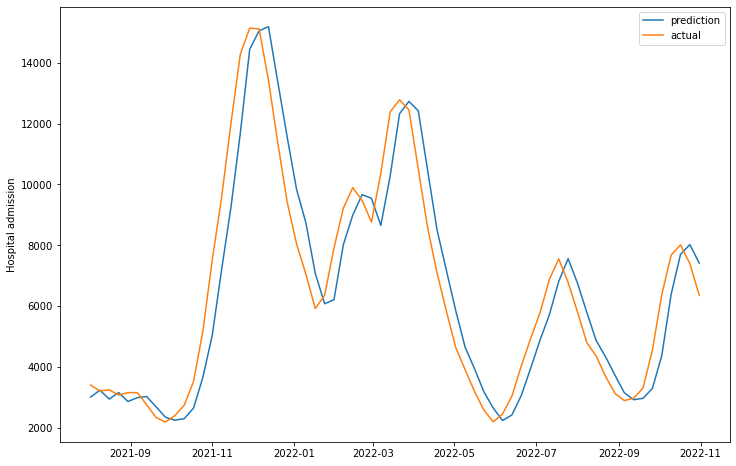

In [91]:
pred_df=pd.DataFrame(table_week.iloc[0,3])
pred_df['actual']=Y_weekinput.iloc[70+1-1:-3].values
pred_df.index=Y_weekinput.index[70+1-1:-3]
plt.figure(figsize=(12,8))
plt.plot(pred_df.iloc[:,0], label='prediction')
plt.plot(pred_df.iloc[:,1], label='actual')
plt.ylabel('Hospital admission')
plt.legend()

In [269]:
rmse_w2=sqrt(mean_squared_error(Y_weekinput.iloc[33:,:].hosp_patients_shift.values,table_week.iloc[0,6]))
r2_w2=r2_score(Y_weekinput.iloc[33:,:].hosp_patients_shift.values,table_week.iloc[0,6])
mae_w2=MAE(Y_weekinput.iloc[33:,:].hosp_patients_shift.values, table_week.iloc[0,6])
mape_w2=mape(Y_weekinput.iloc[33:,:].hosp_patients_shift.values,table_week.iloc[0,6])
print(rmse_w2 )
print(r2_w2)
print(mae_w2)
print(mape_w2)

3241.895341734871
0.28228322674440165
4045.817710826644
0.5173994002987897


In [79]:
predictions=traininng_sliding_window(scale,X_weekinput,Y_weekinput,20, model_inputsize,forecast_steps, list1, list2, num_var,'sigmoid',20,0.001, 1, X_testsize)
dayt=[]
for n in range(len(predictions)):
        predictions[n]
        dayt.append(predictions[n][0][0])
mape_test=mape(Y_weekinput.iloc[20+model_inputsize-1:-3,:].hosp_patients_shift.values,dayt)

week
2020-04-27    8679.0
2020-05-04    7159.0
2020-05-11    6079.0
2020-05-18    4623.0
2020-05-25    3403.0
2020-06-01    2221.0
2020-06-08    1787.0
2020-06-15    1328.0
2020-06-22     857.0
2020-06-29     533.0
2020-07-06     577.0
2020-07-13     579.0
2020-07-20     486.0
2020-07-27     576.0
2020-08-03     806.0
2020-08-10     911.0
2020-08-17     758.0
2020-08-24     671.0
2020-08-31     900.0
2020-09-07    1522.0
2020-09-14    2774.0
2020-09-21    3964.0
2020-09-28    5994.0
Name: hosp_patients_shift, dtype: float64
week
2020-05-04    7159.0
2020-05-11    6079.0
2020-05-18    4623.0
2020-05-25    3403.0
2020-06-01    2221.0
2020-06-08    1787.0
2020-06-15    1328.0
2020-06-22     857.0
2020-06-29     533.0
2020-07-06     577.0
2020-07-13     579.0
2020-07-20     486.0
2020-07-27     576.0
2020-08-03     806.0
2020-08-10     911.0
2020-08-17     758.0
2020-08-24     671.0
2020-08-31     900.0
2020-09-07    1522.0
2020-09-14    2774.0
2020-09-21    3964.0
2020-09-28    5994.0
202

week
2020-12-07    10227.0
2020-12-14    11912.0
2020-12-21    14073.0
2020-12-28    14132.0
2021-01-04    12692.0
2021-01-11    11871.0
2021-01-18    11413.0
2021-01-25    10751.0
2021-02-01     9848.0
2021-02-08     9677.0
2021-02-15     9389.0
2021-02-22     9597.0
2021-03-01     9483.0
2021-03-08    10135.0
2021-03-15    11049.0
2021-03-22    11513.0
2021-03-29    12029.0
2021-04-05    11945.0
2021-04-12    12361.0
2021-04-19    12746.0
2021-04-26    12163.0
2021-05-03    11028.0
2021-05-10     9095.0
Name: hosp_patients_shift, dtype: float64
week
2020-12-14    11912.0
2020-12-21    14073.0
2020-12-28    14132.0
2021-01-04    12692.0
2021-01-11    11871.0
2021-01-18    11413.0
2021-01-25    10751.0
2021-02-01     9848.0
2021-02-08     9677.0
2021-02-15     9389.0
2021-02-22     9597.0
2021-03-01     9483.0
2021-03-08    10135.0
2021-03-15    11049.0
2021-03-22    11513.0
2021-03-29    12029.0
2021-04-05    11945.0
2021-04-12    12361.0
2021-04-19    12746.0
2021-04-26    12163.0
20

week
2021-08-09     3245.0
2021-08-16     3077.0
2021-08-23     3154.0
2021-08-30     3156.0
2021-09-06     2755.0
2021-09-13     2338.0
2021-09-20     2188.0
2021-09-27     2396.0
2021-10-04     2739.0
2021-10-11     3521.0
2021-10-18     5184.0
2021-10-25     7522.0
2021-11-01     9577.0
2021-11-08    12017.0
2021-11-15    14287.0
2021-11-22    15140.0
2021-11-29    15115.0
2021-12-06    13431.0
2021-12-13    11366.0
2021-12-20     9423.0
2021-12-27     8047.0
2022-01-03     7049.0
2022-01-10     5921.0
Name: hosp_patients_shift, dtype: float64
week
2021-08-16     3077.0
2021-08-23     3154.0
2021-08-30     3156.0
2021-09-06     2755.0
2021-09-13     2338.0
2021-09-20     2188.0
2021-09-27     2396.0
2021-10-04     2739.0
2021-10-11     3521.0
2021-10-18     5184.0
2021-10-25     7522.0
2021-11-01     9577.0
2021-11-08    12017.0
2021-11-15    14287.0
2021-11-22    15140.0
2021-11-29    15115.0
2021-12-06    13431.0
2021-12-13    11366.0
2021-12-20     9423.0
2021-12-27     8047.0
20

Name: hosp_patients_shift, dtype: float64
week
2022-05-02    3908.00
2022-05-09    3197.00
2022-05-16    2580.50
2022-05-23    2195.25
2022-05-30    2451.25
2022-06-06    3042.00
2022-06-13    4034.00
2022-06-20    4932.00
2022-06-27    5787.00
2022-07-04    6878.00
2022-07-11    7552.00
2022-07-18    6776.00
2022-07-25    5805.00
2022-08-01    4797.00
2022-08-08    4353.00
2022-08-15    3687.00
2022-08-22    3130.00
2022-08-29    2894.00
2022-09-05    2970.00
2022-09-12    3307.00
2022-09-19    4557.00
2022-09-26    6371.00
2022-10-03    7677.00
Name: hosp_patients_shift, dtype: float64
week
2022-05-09    3197.00
2022-05-16    2580.50
2022-05-23    2195.25
2022-05-30    2451.25
2022-06-06    3042.00
2022-06-13    4034.00
2022-06-20    4932.00
2022-06-27    5787.00
2022-07-04    6878.00
2022-07-11    7552.00
2022-07-18    6776.00
2022-07-25    5805.00
2022-08-01    4797.00
2022-08-08    4353.00
2022-08-15    3687.00
2022-08-22    3130.00
2022-08-29    2894.00
2022-09-05    2970.00
2022

# daily

In [84]:
train_size=130
model_inputsize=10
forecast_steps=4
num_var=X_dayinput.shape[1]
kernel='rbf'
list1=['temp', 'windspeed', 'new_cases','new_deaths', 'icu_patients', 'hosp_patients' ]
list2=['reproduction_rate', 'case_fatality',  'precip', 'humidity']

scale=StandardScaler()
X_testsize=1
rmse_df_day=[]
model_predictions_day=[]
C= [1,5,10,15,20]
eps=[0.001, 0.005, 0.01, 0.03, 0.05, 0.1]
gamma=[0.0005,0.001, 0.005,0.01,0.03, 0.05, 0.1]
for i in range(len(C)):
    for j in range(len(eps)):
        for k in range(len(gamma)):   
            predictions=traininng_sliding_window(scale,X_dayinput,Y_dayinput, train_size, model_inputsize,forecast_steps, list1, list2, num_var,'rbf',C[i],eps[j], gamma[k], X_testsize)
            dayt=[]
            dayt1=[]
            dayt2=[]
            dayt3=[]
            for n in range(len(predictions)):
                predictions[n]
                dayt.append(predictions[n][0][0])
                dayt1.append(predictions[n][1][0])
                dayt2.append(predictions[n][2][0])
                dayt3.append(predictions[n][3][0])
            model_predictions_day.append(dayt)    
            rmse_test=rmse(Y_dayinput.iloc[train_size+model_inputsize-1:-3,:].hosp_patients_shift.values,dayt)
            mape_test=mape(Y_dayinput.iloc[train_size+model_inputsize-1:-3,:].hosp_patients_shift.values,dayt)
            rmse_df_day.append([C[i],eps[j],gamma[k], rmse_test, mape_test, dayt,Y_dayinput.iloc[train_size+model_inputsize-1:-3,:].hosp_patients_shift.values])
            #rmse_array.append([C[i],eps[j],gamma[k], rmse_test, mape_test])
    #mape_array.append(mape(Y_input.iloc[train_size+model_inputsize-1:-3,:].values,dayt))
    

date
2020-04-10    2685.0
2020-04-11    2532.0
2020-04-12    2415.0
2020-04-13    2391.0
2020-04-14    2355.0
               ...  
2021-05-13    1522.0
2021-05-14    1473.0
2021-05-15    1466.0
2021-05-16    1502.0
2021-05-17    1503.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-04-11    2532.0
2020-04-12    2415.0
2020-04-13    2391.0
2020-04-14    2355.0
2020-04-15    2377.0
               ...  
2021-05-14    1473.0
2021-05-15    1466.0
2021-05-16    1502.0
2021-05-17    1503.0
2021-05-18    1365.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-04-12    2415.0
2020-04-13    2391.0
2020-04-14    2355.0
2020-04-15    2377.0
2020-04-16    2286.0
               ...  
2021-05-15    1466.0
2021-05-16    1502.0
2021-05-17    1503.0
2021-05-18    1365.0
2021-05-19    1278.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-04-13    2391.0
2020-04-14    2355.0
2020-04-15    2377.0
2020-04-16    2286.0
2020-04-17    2266.0
               ..

date
2020-05-12    1031.0
2020-05-13    1029.0
2020-05-14     981.0
2020-05-15     971.0
2020-05-16     919.0
               ...  
2021-06-14     395.0
2021-06-15     366.0
2021-06-16     347.0
2021-06-17     315.0
2021-06-18     308.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-05-13    1029.0
2020-05-14     981.0
2020-05-15     971.0
2020-05-16     919.0
2020-05-17     909.0
               ...  
2021-06-15     366.0
2021-06-16     347.0
2021-06-17     315.0
2021-06-18     308.0
2021-06-19     301.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-05-14    981.0
2020-05-15    971.0
2020-05-16    919.0
2020-05-17    909.0
2020-05-18    933.0
              ...  
2021-06-16    347.0
2021-06-17    315.0
2021-06-18    308.0
2021-06-19    301.0
2021-06-20    294.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-05-15    971.0
2020-05-16    919.0
2020-05-17    909.0
2020-05-18    933.0
2020-05-19    922.0
              ...  
2021-06-17   

date
2020-06-12    289.0
2020-06-13    277.0
2020-06-14    281.0
2020-06-15    280.0
2020-06-16    289.0
              ...  
2021-07-15    190.0
2021-07-16    207.0
2021-07-17    235.0
2021-07-18    277.0
2021-07-19    315.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-06-13    277.0
2020-06-14    281.0
2020-06-15    280.0
2020-06-16    289.0
2020-06-17    261.0
              ...  
2021-07-16    207.0
2021-07-17    235.0
2021-07-18    277.0
2021-07-19    315.0
2021-07-20    322.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-06-14    281.0
2020-06-15    280.0
2020-06-16    289.0
2020-06-17    261.0
2020-06-18    235.0
              ...  
2021-07-17    235.0
2021-07-18    277.0
2021-07-19    315.0
2021-07-20    322.0
2021-07-21    329.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-06-15    280.0
2020-06-16    289.0
2020-06-17    261.0
2020-06-18    235.0
2020-06-19    220.0
              ...  
2021-07-18    277.0
2021-07-19    3

date
2020-07-14     85.0
2020-07-15     80.0
2020-07-16     73.0
2020-07-17     78.0
2020-07-18     73.0
              ...  
2021-08-16    488.0
2021-08-17    469.0
2021-08-18    452.0
2021-08-19    452.0
2021-08-20    439.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-07-15     80.0
2020-07-16     73.0
2020-07-17     78.0
2020-07-18     73.0
2020-07-19     81.0
              ...  
2021-08-17    469.0
2021-08-18    452.0
2021-08-19    452.0
2021-08-20    439.0
2021-08-21    441.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-07-16     73.0
2020-07-17     78.0
2020-07-18     73.0
2020-07-19     81.0
2020-07-20     90.0
              ...  
2021-08-18    452.0
2021-08-19    452.0
2021-08-20    439.0
2021-08-21    441.0
2021-08-22    454.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-07-17     78.0
2020-07-18     73.0
2020-07-19     81.0
2020-07-20     90.0
2020-07-21     85.0
              ...  
2021-08-19    452.0
2021-08-20    4

date
2020-08-15    122.0
2020-08-16    126.0
2020-08-17    129.0
2020-08-18    125.0
2020-08-19    138.0
              ...  
2021-09-17    359.0
2021-09-18    364.0
2021-09-19    367.0
2021-09-20    378.0
2021-09-21    346.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-08-16    126.0
2020-08-17    129.0
2020-08-18    125.0
2020-08-19    138.0
2020-08-20    133.0
              ...  
2021-09-18    364.0
2021-09-19    367.0
2021-09-20    378.0
2021-09-21    346.0
2021-09-22    330.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-08-17    129.0
2020-08-18    125.0
2020-08-19    138.0
2020-08-20    133.0
2020-08-21    131.0
              ...  
2021-09-19    367.0
2021-09-20    378.0
2021-09-21    346.0
2021-09-22    330.0
2021-09-23    316.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-08-18    125.0
2020-08-19    138.0
2020-08-20    133.0
2020-08-21    131.0
2020-08-22    129.0
              ...  
2021-09-20    378.0
2021-09-21    3

date
2020-09-16    212.0
2020-09-17    230.0
2020-09-18    260.0
2020-09-19    276.0
2020-09-20    325.0
              ...  
2021-10-19    485.0
2021-10-20    496.0
2021-10-21    524.0
2021-10-22    524.0
2021-10-23    563.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-09-17    230.0
2020-09-18    260.0
2020-09-19    276.0
2020-09-20    325.0
2020-09-21    329.0
              ...  
2021-10-20    496.0
2021-10-21    524.0
2021-10-22    524.0
2021-10-23    563.0
2021-10-24    597.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-09-18    260.0
2020-09-19    276.0
2020-09-20    325.0
2020-09-21    329.0
2020-09-22    371.0
              ...  
2021-10-21    524.0
2021-10-22    524.0
2021-10-23    563.0
2021-10-24    597.0
2021-10-25    657.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-09-19    276.0
2020-09-20    325.0
2020-09-21    329.0
2020-09-22    371.0
2020-09-23    395.0
              ...  
2021-10-22    524.0
2021-10-23    5

date
2020-10-18    1359.0
2020-10-19    1440.0
2020-10-20    1493.0
2020-10-21    1540.0
2020-10-22    1601.0
               ...  
2021-11-20    1850.0
2021-11-21    1960.0
2021-11-22    2052.0
2021-11-23    2030.0
2021-11-24    2015.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-10-19    1440.0
2020-10-20    1493.0
2020-10-21    1540.0
2020-10-22    1601.0
2020-10-23    1614.0
               ...  
2021-11-21    1960.0
2021-11-22    2052.0
2021-11-23    2030.0
2021-11-24    2015.0
2021-11-25    2070.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-10-20    1493.0
2020-10-21    1540.0
2020-10-22    1601.0
2020-10-23    1614.0
2020-10-24    1657.0
               ...  
2021-11-22    2052.0
2021-11-23    2030.0
2021-11-24    2015.0
2021-11-25    2070.0
2021-11-26    2069.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-10-21    1540.0
2020-10-22    1601.0
2020-10-23    1614.0
2020-10-24    1657.0
2020-10-25    1743.0
               ..

date
2020-11-19    1414.0
2020-11-20    1352.0
2020-11-21    1393.0
2020-11-22    1432.0
2020-11-23    1399.0
               ...  
2021-12-22    1657.0
2021-12-23    1580.0
2021-12-24    1444.0
2021-12-25    1442.0
2021-12-26    1464.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-11-20    1352.0
2020-11-21    1393.0
2020-11-22    1432.0
2020-11-23    1399.0
2020-11-24    1310.0
               ...  
2021-12-23    1580.0
2021-12-24    1444.0
2021-12-25    1442.0
2021-12-26    1464.0
2021-12-27    1471.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-11-21    1393.0
2020-11-22    1432.0
2020-11-23    1399.0
2020-11-24    1310.0
2020-11-25    1257.0
               ...  
2021-12-24    1444.0
2021-12-25    1442.0
2021-12-26    1464.0
2021-12-27    1471.0
2021-12-28    1450.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-11-22    1432.0
2020-11-23    1399.0
2020-11-24    1310.0
2020-11-25    1257.0
2020-11-26    1251.0
               ..

date
2020-12-21    1703.0
2020-12-22    1686.0
2020-12-23    1712.0
2020-12-24    1704.0
2020-12-25    1734.0
               ...  
2022-01-23     879.0
2022-01-24     911.0
2022-01-25     905.0
2022-01-26     898.0
2022-01-27     903.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-12-22    1686.0
2020-12-23    1712.0
2020-12-24    1704.0
2020-12-25    1734.0
2020-12-26    1797.0
               ...  
2022-01-24     911.0
2022-01-25     905.0
2022-01-26     898.0
2022-01-27     903.0
2022-01-28     916.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-12-23    1712.0
2020-12-24    1704.0
2020-12-25    1734.0
2020-12-26    1797.0
2020-12-27    1922.0
               ...  
2022-01-25     905.0
2022-01-26     898.0
2022-01-27     903.0
2022-01-28     916.0
2022-01-29     945.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-12-24    1704.0
2020-12-25    1734.0
2020-12-26    1797.0
2020-12-27    1922.0
2020-12-28    2077.0
               ..

date
2021-01-22    1633.0
2021-01-23    1667.0
2021-01-24    1720.0
2021-01-25    1705.0
2021-01-26    1648.0
               ...  
2022-02-24    1354.0
2022-02-25    1229.0
2022-02-26    1190.0
2022-02-27    1308.0
2022-02-28    1258.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-01-23    1667.0
2021-01-24    1720.0
2021-01-25    1705.0
2021-01-26    1648.0
2021-01-27    1595.0
               ...  
2022-02-25    1229.0
2022-02-26    1190.0
2022-02-27    1308.0
2022-02-28    1258.0
2022-03-01    1285.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-01-24    1720.0
2021-01-25    1705.0
2021-01-26    1648.0
2021-01-27    1595.0
2021-01-28    1572.0
               ...  
2022-02-26    1190.0
2022-02-27    1308.0
2022-02-28    1258.0
2022-03-01    1285.0
2022-03-02    1256.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-01-25    1705.0
2021-01-26    1648.0
2021-01-27    1595.0
2021-01-28    1572.0
2021-01-29    1600.0
               ..

date
2021-02-23    1350.0
2021-02-24    1361.0
2021-02-25    1339.0
2021-02-26    1291.0
2021-02-27    1322.0
               ...  
2022-03-28    1933.0
2022-03-29    1855.0
2022-03-30    1787.0
2022-03-31    1706.0
2022-04-01    1633.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-02-24    1361.0
2021-02-25    1339.0
2021-02-26    1291.0
2021-02-27    1322.0
2021-02-28    1375.0
               ...  
2022-03-29    1855.0
2022-03-30    1787.0
2022-03-31    1706.0
2022-04-01    1633.0
2022-04-02    1624.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-02-25    1339.0
2021-02-26    1291.0
2021-02-27    1322.0
2021-02-28    1375.0
2021-03-01    1444.0
               ...  
2022-03-30    1787.0
2022-03-31    1706.0
2022-04-01    1633.0
2022-04-02    1624.0
2022-04-03    1688.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-02-26    1291.0
2021-02-27    1322.0
2021-02-28    1375.0
2021-03-01    1444.0
2021-03-02    1397.0
               ..

date
2021-03-23    1562.000000
2021-03-24    1573.000000
2021-03-25    1596.000000
2021-03-26    1595.000000
2021-03-27    1593.000000
                 ...     
2022-04-25     906.000000
2022-04-26     853.000000
2022-04-27     800.000000
2022-04-28     787.000000
2022-04-29     786.333333
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-03-24    1573.000000
2021-03-25    1596.000000
2021-03-26    1595.000000
2021-03-27    1593.000000
2021-03-28    1667.000000
                 ...     
2022-04-26     853.000000
2022-04-27     800.000000
2022-04-28     787.000000
2022-04-29     786.333333
2022-04-30     785.666667
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-03-25    1596.000000
2021-03-26    1595.000000
2021-03-27    1593.000000
2021-03-28    1667.000000
2021-03-29    1728.000000
                 ...     
2022-04-27     800.000000
2022-04-28     787.000000
2022-04-29     786.333333
2022-04-30     785.666667
2022-05-01     785.000000
Name: hosp_patien

date
2021-04-21    1843.000000
2021-04-22    1776.000000
2021-04-23    1698.000000
2021-04-24    1691.000000
2021-04-25    1759.000000
                 ...     
2022-05-24     387.000000
2022-05-25     366.500000
2022-05-26     346.000000
2022-05-27     340.333333
2022-05-28     334.666667
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-04-22    1776.000000
2021-04-23    1698.000000
2021-04-24    1691.000000
2021-04-25    1759.000000
2021-04-26    1777.000000
                 ...     
2022-05-25     366.500000
2022-05-26     346.000000
2022-05-27     340.333333
2022-05-28     334.666667
2022-05-29     329.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-04-23    1698.000000
2021-04-24    1691.000000
2021-04-25    1759.000000
2021-04-26    1777.000000
2021-04-27    1797.000000
                 ...     
2022-05-26     346.000000
2022-05-27     340.333333
2022-05-28     334.666667
2022-05-29     329.000000
2022-05-30     330.000000
Name: hosp_patien

date
2021-05-16    1502.000000
2021-05-17    1503.000000
2021-05-18    1365.000000
2021-05-19    1278.000000
2021-05-20    1214.000000
                 ...     
2022-06-18     497.333333
2022-06-19     528.000000
2022-06-20     583.000000
2022-06-21     580.000000
2022-06-22     563.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-05-17    1503.0
2021-05-18    1365.0
2021-05-19    1278.0
2021-05-20    1214.0
2021-05-21    1129.0
               ...  
2022-06-19     528.0
2022-06-20     583.0
2022-06-21     580.0
2022-06-22     563.0
2022-06-23     566.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-05-18    1365.000000
2021-05-19    1278.000000
2021-05-20    1214.000000
2021-05-21    1129.000000
2021-05-22    1104.000000
                 ...     
2022-06-20     583.000000
2022-06-21     580.000000
2022-06-22     563.000000
2022-06-23     566.000000
2022-06-24     593.333333
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-05-19  

date
2021-06-15     366.000000
2021-06-16     347.000000
2021-06-17     315.000000
2021-06-18     308.000000
2021-06-19     301.000000
                 ...     
2022-07-18    1081.000000
2022-07-19    1108.000000
2022-07-20    1087.000000
2022-07-21    1069.000000
2022-07-22    1071.333333
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-06-16     347.000000
2021-06-17     315.000000
2021-06-18     308.000000
2021-06-19     301.000000
2021-06-20     294.000000
                 ...     
2022-07-19    1108.000000
2022-07-20    1087.000000
2022-07-21    1069.000000
2022-07-22    1071.333333
2022-07-23    1073.666667
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-06-17     315.000000
2021-06-18     308.000000
2021-06-19     301.000000
2021-06-20     294.000000
2021-06-21     277.000000
                 ...     
2022-07-20    1087.000000
2022-07-21    1069.000000
2022-07-22    1071.333333
2022-07-23    1073.666667
2022-07-24    1076.000000
Name: hosp_patien

date
2021-07-14    158.0
2021-07-15    190.0
2021-07-16    207.0
2021-07-17    235.0
2021-07-18    277.0
              ...  
2022-08-16    646.0
2022-08-17    638.0
2022-08-18    602.0
2022-08-19    590.0
2022-08-20    578.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-07-15    190.0
2021-07-16    207.0
2021-07-17    235.0
2021-07-18    277.0
2021-07-19    315.0
              ...  
2022-08-17    638.0
2022-08-18    602.0
2022-08-19    590.0
2022-08-20    578.0
2022-08-21    566.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-07-16    207.0
2021-07-17    235.0
2021-07-18    277.0
2021-07-19    315.0
2021-07-20    322.0
              ...  
2022-08-18    602.0
2022-08-19    590.0
2022-08-20    578.0
2022-08-21    566.0
2022-08-22    539.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-07-17    235.0
2021-07-18    277.0
2021-07-19    315.0
2021-07-20    322.0
2021-07-21    329.0
              ...  
2022-08-19    590.0
2022-08-20    5

date
2021-08-13    454.000000
2021-08-14    471.000000
2021-08-15    504.000000
2021-08-16    488.000000
2021-08-17    469.000000
                 ...    
2022-09-15    403.000000
2022-09-16    414.333333
2022-09-17    425.666667
2022-09-18    437.000000
2022-09-19    447.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-08-14    471.000000
2021-08-15    504.000000
2021-08-16    488.000000
2021-08-17    469.000000
2021-08-18    452.000000
                 ...    
2022-09-16    414.333333
2022-09-17    425.666667
2022-09-18    437.000000
2022-09-19    447.000000
2022-09-20    451.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-08-15    504.000000
2021-08-16    488.000000
2021-08-17    469.000000
2021-08-18    452.000000
2021-08-19    452.000000
                 ...    
2022-09-17    425.666667
2022-09-18    437.000000
2022-09-19    447.000000
2022-09-20    451.000000
2022-09-21    462.000000
Name: hosp_patients_shift, Length: 403, dtype: flo

date
2021-09-07     452.000000
2021-09-08     443.000000
2021-09-09     462.000000
2021-09-10     439.000000
2021-09-11     435.000000
                 ...     
2022-10-10    1113.000000
2022-10-11    1095.000000
2022-10-12    1110.000000
2022-10-13    1057.000000
2022-10-14    1093.333333
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-09-08     443.000000
2021-09-09     462.000000
2021-09-10     439.000000
2021-09-11     435.000000
2021-09-12     450.000000
                 ...     
2022-10-11    1095.000000
2022-10-12    1110.000000
2022-10-13    1057.000000
2022-10-14    1093.333333
2022-10-15    1129.666667
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-09-09     462.000000
2021-09-10     439.000000
2021-09-11     435.000000
2021-09-12     450.000000
2021-09-13     432.000000
                 ...     
2022-10-12    1110.000000
2022-10-13    1057.000000
2022-10-14    1093.333333
2022-10-15    1129.666667
2022-10-16    1166.000000
Name: hosp_patien

date
2021-10-03    326.000000
2021-10-04    351.000000
2021-10-05    347.000000
2021-10-06    341.000000
2021-10-07    339.000000
                 ...    
2022-11-05    827.333333
2022-11-06    816.000000
2022-11-07    816.000000
2022-11-08    755.000000
2022-11-09    730.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-10-04    351.0
2021-10-05    347.0
2021-10-06    341.0
2021-10-07    339.0
2021-10-08    343.0
              ...  
2022-11-06    816.0
2022-11-07    816.0
2022-11-08    755.0
2022-11-09    730.0
2022-11-10    692.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-10-05    347.000000
2021-10-06    341.000000
2021-10-07    339.000000
2021-10-08    343.000000
2021-10-09    349.000000
                 ...    
2022-11-07    816.000000
2022-11-08    755.000000
2022-11-09    730.000000
2022-11-10    692.000000
2022-11-11    685.666667
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-10-06    341.000000
2021-10-07    339.00

date
2021-11-02    1060.0
2021-11-03    1054.0
2021-11-04    1064.0
2021-11-05    1111.0
2021-11-06    1185.0
               ...  
2022-12-05     585.0
2022-12-06     581.0
2022-12-07     593.0
2022-12-08     595.0
2022-12-09     595.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-11-03    1054.0
2021-11-04    1064.0
2021-11-05    1111.0
2021-11-06    1185.0
2021-11-07    1247.0
               ...  
2022-12-06     581.0
2022-12-07     593.0
2022-12-08     595.0
2022-12-09     595.0
2022-12-10     595.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-11-04    1064.0
2021-11-05    1111.0
2021-11-06    1185.0
2021-11-07    1247.0
2021-11-08    1328.0
               ...  
2022-12-07     593.0
2022-12-08     595.0
2022-12-09     595.0
2022-12-10     595.0
2022-12-11     595.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-11-05    1111.0
2021-11-06    1185.0
2021-11-07    1247.0
2021-11-08    1328.0
2021-11-09    1320.0
               ..

date
2020-04-19    2165.0
2020-04-20    2157.0
2020-04-21    2069.0
2020-04-22    1856.0
2020-04-23    1765.0
               ...  
2021-05-22    1104.0
2021-05-23    1097.0
2021-05-24    1102.0
2021-05-25    1059.0
2021-05-26     971.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-04-20    2157.0
2020-04-21    2069.0
2020-04-22    1856.0
2020-04-23    1765.0
2020-04-24    1746.0
               ...  
2021-05-23    1097.0
2021-05-24    1102.0
2021-05-25    1059.0
2021-05-26     971.0
2021-05-27     919.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-04-21    2069.0
2020-04-22    1856.0
2020-04-23    1765.0
2020-04-24    1746.0
2020-04-25    1704.0
               ...  
2021-05-24    1102.0
2021-05-25    1059.0
2021-05-26     971.0
2021-05-27     919.0
2021-05-28     853.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-04-22    1856.0
2020-04-23    1765.0
2020-04-24    1746.0
2020-04-25    1704.0
2020-04-26    1626.0
               ..

date
2020-05-18    933.0
2020-05-19    922.0
2020-05-20    911.0
2020-05-21    863.0
2020-05-22    811.0
              ...  
2021-06-20    294.0
2021-06-21    277.0
2021-06-22    255.0
2021-06-23    234.0
2021-06-24    216.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-05-19    922.0
2020-05-20    911.0
2020-05-21    863.0
2020-05-22    811.0
2020-05-23    730.0
              ...  
2021-06-21    277.0
2021-06-22    255.0
2021-06-23    234.0
2021-06-24    216.0
2021-06-25    198.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-05-20    911.0
2020-05-21    863.0
2020-05-22    811.0
2020-05-23    730.0
2020-05-24    756.0
              ...  
2021-06-22    255.0
2021-06-23    234.0
2021-06-24    216.0
2021-06-25    198.0
2021-06-26    204.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-05-21    863.0
2020-05-22    811.0
2020-05-23    730.0
2020-05-24    756.0
2020-05-25    698.0
              ...  
2021-06-23    234.0
2021-06-24    2

date
2020-06-18    235.0
2020-06-19    220.0
2020-06-20    221.0
2020-06-21    194.0
2020-06-22    211.0
              ...  
2021-07-21    329.0
2021-07-22    370.0
2021-07-23    388.0
2021-07-24    399.0
2021-07-25    437.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-06-19    220.0
2020-06-20    221.0
2020-06-21    194.0
2020-06-22    211.0
2020-06-23    197.0
              ...  
2021-07-22    370.0
2021-07-23    388.0
2021-07-24    399.0
2021-07-25    437.0
2021-07-26    457.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-06-20    221.0
2020-06-21    194.0
2020-06-22    211.0
2020-06-23    197.0
2020-06-24    178.0
              ...  
2021-07-23    388.0
2021-07-24    399.0
2021-07-25    437.0
2021-07-26    457.0
2021-07-27    465.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-06-21    194.0
2020-06-22    211.0
2020-06-23    197.0
2020-06-24    178.0
2020-06-25    190.0
              ...  
2021-07-24    399.0
2021-07-25    4

date
2020-07-21     85.0
2020-07-22     91.0
2020-07-23     74.0
2020-07-24     91.0
2020-07-25     67.0
              ...  
2021-08-23    461.0
2021-08-24    446.0
2021-08-25    440.0
2021-08-26    437.0
2021-08-27    421.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-07-22     91.0
2020-07-23     74.0
2020-07-24     91.0
2020-07-25     67.0
2020-07-26     70.0
              ...  
2021-08-24    446.0
2021-08-25    440.0
2021-08-26    437.0
2021-08-27    421.0
2021-08-28    418.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-07-23     74.0
2020-07-24     91.0
2020-07-25     67.0
2020-07-26     70.0
2020-07-27     77.0
              ...  
2021-08-25    440.0
2021-08-26    437.0
2021-08-27    421.0
2021-08-28    418.0
2021-08-29    469.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-07-24     91.0
2020-07-25     67.0
2020-07-26     70.0
2020-07-27     77.0
2020-07-28     63.0
              ...  
2021-08-26    437.0
2021-08-27    4

date
2020-08-20    133.0
2020-08-21    131.0
2020-08-22    129.0
2020-08-23    121.0
2020-08-24    120.0
              ...  
2021-09-22    330.0
2021-09-23    316.0
2021-09-24    297.0
2021-09-25    304.0
2021-09-26    320.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-08-21    131.0
2020-08-22    129.0
2020-08-23    121.0
2020-08-24    120.0
2020-08-25    120.0
              ...  
2021-09-23    316.0
2021-09-24    297.0
2021-09-25    304.0
2021-09-26    320.0
2021-09-27    321.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-08-22    129.0
2020-08-23    121.0
2020-08-24    120.0
2020-08-25    120.0
2020-08-26    107.0
              ...  
2021-09-24    297.0
2021-09-25    304.0
2021-09-26    320.0
2021-09-27    321.0
2021-09-28    313.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-08-23    121.0
2020-08-24    120.0
2020-08-25    120.0
2020-08-26    107.0
2020-08-27    100.0
              ...  
2021-09-25    304.0
2021-09-26    3

date
2020-09-20    325.0
2020-09-21    329.0
2020-09-22    371.0
2020-09-23    395.0
2020-09-24    431.0
              ...  
2021-10-23    563.0
2021-10-24    597.0
2021-10-25    657.0
2021-10-26    659.0
2021-10-27    741.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-09-21    329.0
2020-09-22    371.0
2020-09-23    395.0
2020-09-24    431.0
2020-09-25    433.0
              ...  
2021-10-24    597.0
2021-10-25    657.0
2021-10-26    659.0
2021-10-27    741.0
2021-10-28    804.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-09-22    371.0
2020-09-23    395.0
2020-09-24    431.0
2020-09-25    433.0
2020-09-26    490.0
              ...  
2021-10-25    657.0
2021-10-26    659.0
2021-10-27    741.0
2021-10-28    804.0
2021-10-29    824.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-09-23    395.0
2020-09-24    431.0
2020-09-25    433.0
2020-09-26    490.0
2020-09-27    518.0
              ...  
2021-10-26    659.0
2021-10-27    7

date
2020-10-19    1440.0
2020-10-20    1493.0
2020-10-21    1540.0
2020-10-22    1601.0
2020-10-23    1614.0
               ...  
2021-11-21    1960.0
2021-11-22    2052.0
2021-11-23    2030.0
2021-11-24    2015.0
2021-11-25    2070.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-10-20    1493.0
2020-10-21    1540.0
2020-10-22    1601.0
2020-10-23    1614.0
2020-10-24    1657.0
               ...  
2021-11-22    2052.0
2021-11-23    2030.0
2021-11-24    2015.0
2021-11-25    2070.0
2021-11-26    2069.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-10-21    1540.0
2020-10-22    1601.0
2020-10-23    1614.0
2020-10-24    1657.0
2020-10-25    1743.0
               ...  
2021-11-23    2030.0
2021-11-24    2015.0
2021-11-25    2070.0
2021-11-26    2069.0
2021-11-27    2091.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-10-22    1601.0
2020-10-23    1614.0
2020-10-24    1657.0
2020-10-25    1743.0
2020-10-26    1829.0
               ..

date
2020-11-17    1528.0
2020-11-18    1475.0
2020-11-19    1414.0
2020-11-20    1352.0
2020-11-21    1393.0
               ...  
2021-12-20    1754.0
2021-12-21    1674.0
2021-12-22    1657.0
2021-12-23    1580.0
2021-12-24    1444.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-11-18    1475.0
2020-11-19    1414.0
2020-11-20    1352.0
2020-11-21    1393.0
2020-11-22    1432.0
               ...  
2021-12-21    1674.0
2021-12-22    1657.0
2021-12-23    1580.0
2021-12-24    1444.0
2021-12-25    1442.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-11-19    1414.0
2020-11-20    1352.0
2020-11-21    1393.0
2020-11-22    1432.0
2020-11-23    1399.0
               ...  
2021-12-22    1657.0
2021-12-23    1580.0
2021-12-24    1444.0
2021-12-25    1442.0
2021-12-26    1464.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-11-20    1352.0
2020-11-21    1393.0
2020-11-22    1432.0
2020-11-23    1399.0
2020-11-24    1310.0
               ..

date
2020-12-17    1485.0
2020-12-18    1505.0
2020-12-19    1533.0
2020-12-20    1576.0
2020-12-21    1703.0
               ...  
2022-01-19     834.0
2022-01-20     821.0
2022-01-21     796.0
2022-01-22     818.0
2022-01-23     879.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-12-18    1505.0
2020-12-19    1533.0
2020-12-20    1576.0
2020-12-21    1703.0
2020-12-22    1686.0
               ...  
2022-01-20     821.0
2022-01-21     796.0
2022-01-22     818.0
2022-01-23     879.0
2022-01-24     911.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-12-19    1533.0
2020-12-20    1576.0
2020-12-21    1703.0
2020-12-22    1686.0
2020-12-23    1712.0
               ...  
2022-01-21     796.0
2022-01-22     818.0
2022-01-23     879.0
2022-01-24     911.0
2022-01-25     905.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-12-20    1576.0
2020-12-21    1703.0
2020-12-22    1686.0
2020-12-23    1712.0
2020-12-24    1704.0
               ..

date
2021-01-17    1744.0
2021-01-18    1767.0
2021-01-19    1709.0
2021-01-20    1667.0
2021-01-21    1684.0
               ...  
2022-02-19    1378.0
2022-02-20    1445.0
2022-02-21    1455.0
2022-02-22    1411.0
2022-02-23    1392.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-01-18    1767.0
2021-01-19    1709.0
2021-01-20    1667.0
2021-01-21    1684.0
2021-01-22    1633.0
               ...  
2022-02-20    1445.0
2022-02-21    1455.0
2022-02-22    1411.0
2022-02-23    1392.0
2022-02-24    1354.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-01-19    1709.0
2021-01-20    1667.0
2021-01-21    1684.0
2021-01-22    1633.0
2021-01-23    1667.0
               ...  
2022-02-21    1455.0
2022-02-22    1411.0
2022-02-23    1392.0
2022-02-24    1354.0
2022-02-25    1229.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-01-20    1667.0
2021-01-21    1684.0
2021-01-22    1633.0
2021-01-23    1667.0
2021-01-24    1720.0
               ..

date
2021-02-16    1399.0
2021-02-17    1408.0
2021-02-18    1433.0
2021-02-19    1336.0
2021-02-20    1315.0
               ...  
2022-03-21    1832.0
2022-03-22    1869.0
2022-03-23    1826.0
2022-03-24    1854.0
2022-03-25    1757.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-02-17    1408.0
2021-02-18    1433.0
2021-02-19    1336.0
2021-02-20    1315.0
2021-02-21    1347.0
               ...  
2022-03-22    1869.0
2022-03-23    1826.0
2022-03-24    1854.0
2022-03-25    1757.0
2022-03-26    1776.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-02-18    1433.0
2021-02-19    1336.0
2021-02-20    1315.0
2021-02-21    1347.0
2021-02-22    1379.0
               ...  
2022-03-23    1826.0
2022-03-24    1854.0
2022-03-25    1757.0
2022-03-26    1776.0
2022-03-27    1916.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-02-19    1336.0
2021-02-20    1315.0
2021-02-21    1347.0
2021-02-22    1379.0
2021-02-23    1350.0
               ..

date
2021-03-18    1462.000000
2021-03-19    1445.000000
2021-03-20    1462.000000
2021-03-21    1555.000000
2021-03-22    1575.000000
                 ...     
2022-04-20    1020.000000
2022-04-21     966.000000
2022-04-22     949.333333
2022-04-23     932.666667
2022-04-24     916.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-03-19    1445.000000
2021-03-20    1462.000000
2021-03-21    1555.000000
2021-03-22    1575.000000
2021-03-23    1562.000000
                 ...     
2022-04-21     966.000000
2022-04-22     949.333333
2022-04-23     932.666667
2022-04-24     916.000000
2022-04-25     906.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-03-20    1462.000000
2021-03-21    1555.000000
2021-03-22    1575.000000
2021-03-23    1562.000000
2021-03-24    1573.000000
                 ...     
2022-04-22     949.333333
2022-04-23     932.666667
2022-04-24     916.000000
2022-04-25     906.000000
2022-04-26     853.000000
Name: hosp_patien

date
2021-04-16    1626.0
2021-04-17    1670.0
2021-04-18    1731.0
2021-04-19    1830.0
2021-04-20    1792.0
               ...  
2022-05-19     420.0
2022-05-20     419.0
2022-05-21     418.0
2022-05-22     417.0
2022-05-23     389.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-04-17    1670.0
2021-04-18    1731.0
2021-04-19    1830.0
2021-04-20    1792.0
2021-04-21    1843.0
               ...  
2022-05-20     419.0
2022-05-21     418.0
2022-05-22     417.0
2022-05-23     389.0
2022-05-24     387.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-04-18    1731.0
2021-04-19    1830.0
2021-04-20    1792.0
2021-04-21    1843.0
2021-04-22    1776.0
               ...  
2022-05-21     418.0
2022-05-22     417.0
2022-05-23     389.0
2022-05-24     387.0
2022-05-25     366.5
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-04-19    1830.0
2021-04-20    1792.0
2021-04-21    1843.0
2021-04-22    1776.0
2021-04-23    1698.0
               ..

date
2021-05-16    1502.000000
2021-05-17    1503.000000
2021-05-18    1365.000000
2021-05-19    1278.000000
2021-05-20    1214.000000
                 ...     
2022-06-18     497.333333
2022-06-19     528.000000
2022-06-20     583.000000
2022-06-21     580.000000
2022-06-22     563.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-05-17    1503.0
2021-05-18    1365.0
2021-05-19    1278.0
2021-05-20    1214.0
2021-05-21    1129.0
               ...  
2022-06-19     528.0
2022-06-20     583.0
2022-06-21     580.0
2022-06-22     563.0
2022-06-23     566.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-05-18    1365.000000
2021-05-19    1278.000000
2021-05-20    1214.000000
2021-05-21    1129.000000
2021-05-22    1104.000000
                 ...     
2022-06-20     583.000000
2022-06-21     580.000000
2022-06-22     563.000000
2022-06-23     566.000000
2022-06-24     593.333333
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-05-19  

date
2021-06-15     366.000000
2021-06-16     347.000000
2021-06-17     315.000000
2021-06-18     308.000000
2021-06-19     301.000000
                 ...     
2022-07-18    1081.000000
2022-07-19    1108.000000
2022-07-20    1087.000000
2022-07-21    1069.000000
2022-07-22    1071.333333
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-06-16     347.000000
2021-06-17     315.000000
2021-06-18     308.000000
2021-06-19     301.000000
2021-06-20     294.000000
                 ...     
2022-07-19    1108.000000
2022-07-20    1087.000000
2022-07-21    1069.000000
2022-07-22    1071.333333
2022-07-23    1073.666667
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-06-17     315.000000
2021-06-18     308.000000
2021-06-19     301.000000
2021-06-20     294.000000
2021-06-21     277.000000
                 ...     
2022-07-20    1087.000000
2022-07-21    1069.000000
2022-07-22    1071.333333
2022-07-23    1073.666667
2022-07-24    1076.000000
Name: hosp_patien

date
2021-07-15    190.0
2021-07-16    207.0
2021-07-17    235.0
2021-07-18    277.0
2021-07-19    315.0
              ...  
2022-08-17    638.0
2022-08-18    602.0
2022-08-19    590.0
2022-08-20    578.0
2022-08-21    566.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-07-16    207.0
2021-07-17    235.0
2021-07-18    277.0
2021-07-19    315.0
2021-07-20    322.0
              ...  
2022-08-18    602.0
2022-08-19    590.0
2022-08-20    578.0
2022-08-21    566.0
2022-08-22    539.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-07-17    235.0
2021-07-18    277.0
2021-07-19    315.0
2021-07-20    322.0
2021-07-21    329.0
              ...  
2022-08-19    590.0
2022-08-20    578.0
2022-08-21    566.0
2022-08-22    539.0
2022-08-23    527.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-07-18    277.0
2021-07-19    315.0
2021-07-20    322.0
2021-07-21    329.0
2021-07-22    370.0
              ...  
2022-08-20    578.0
2022-08-21    5

date
2021-08-14    471.000000
2021-08-15    504.000000
2021-08-16    488.000000
2021-08-17    469.000000
2021-08-18    452.000000
                 ...    
2022-09-16    414.333333
2022-09-17    425.666667
2022-09-18    437.000000
2022-09-19    447.000000
2022-09-20    451.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-08-15    504.000000
2021-08-16    488.000000
2021-08-17    469.000000
2021-08-18    452.000000
2021-08-19    452.000000
                 ...    
2022-09-17    425.666667
2022-09-18    437.000000
2022-09-19    447.000000
2022-09-20    451.000000
2022-09-21    462.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-08-16    488.0
2021-08-17    469.0
2021-08-18    452.0
2021-08-19    452.0
2021-08-20    439.0
              ...  
2022-09-18    437.0
2022-09-19    447.0
2022-09-20    451.0
2022-09-21    462.0
2022-09-22    471.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-08-17    469.000000
2021-08-18    452.00

date
2021-09-08     443.000000
2021-09-09     462.000000
2021-09-10     439.000000
2021-09-11     435.000000
2021-09-12     450.000000
                 ...     
2022-10-11    1095.000000
2022-10-12    1110.000000
2022-10-13    1057.000000
2022-10-14    1093.333333
2022-10-15    1129.666667
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-09-09     462.000000
2021-09-10     439.000000
2021-09-11     435.000000
2021-09-12     450.000000
2021-09-13     432.000000
                 ...     
2022-10-12    1110.000000
2022-10-13    1057.000000
2022-10-14    1093.333333
2022-10-15    1129.666667
2022-10-16    1166.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-09-10     439.000000
2021-09-11     435.000000
2021-09-12     450.000000
2021-09-13     432.000000
2021-09-14     400.000000
                 ...     
2022-10-13    1057.000000
2022-10-14    1093.333333
2022-10-15    1129.666667
2022-10-16    1166.000000
2022-10-17    1182.000000
Name: hosp_patien

date
2021-10-08    343.000000
2021-10-09    349.000000
2021-10-10    359.000000
2021-10-11    374.000000
2021-10-12    387.000000
                 ...    
2022-11-10    692.000000
2022-11-11    685.666667
2022-11-12    679.333333
2022-11-13    673.000000
2022-11-14    678.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-10-09    349.000000
2021-10-10    359.000000
2021-10-11    374.000000
2021-10-12    387.000000
2021-10-13    394.000000
                 ...    
2022-11-11    685.666667
2022-11-12    679.333333
2022-11-13    673.000000
2022-11-14    678.000000
2022-11-15    645.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-10-10    359.000000
2021-10-11    374.000000
2021-10-12    387.000000
2021-10-13    394.000000
2021-10-14    406.000000
                 ...    
2022-11-12    679.333333
2022-11-13    673.000000
2022-11-14    678.000000
2022-11-15    645.000000
2022-11-16    640.000000
Name: hosp_patients_shift, Length: 403, dtype: flo

date
2021-11-07    1247.0
2021-11-08    1328.0
2021-11-09    1320.0
2021-11-10    1369.0
2021-11-11    1402.0
               ...  
2022-12-10     595.0
2022-12-11     595.0
2022-12-12     595.0
2022-12-13     595.0
2022-12-14     595.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-11-08    1328.0
2021-11-09    1320.0
2021-11-10    1369.0
2021-11-11    1402.0
2021-11-12    1425.0
               ...  
2022-12-11     595.0
2022-12-12     595.0
2022-12-13     595.0
2022-12-14     595.0
2022-12-15     595.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-11-09    1320.0
2021-11-10    1369.0
2021-11-11    1402.0
2021-11-12    1425.0
2021-11-13    1486.0
               ...  
2022-12-12     595.0
2022-12-13     595.0
2022-12-14     595.0
2022-12-15     595.0
2022-12-16     595.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-11-10    1369.0
2021-11-11    1402.0
2021-11-12    1425.0
2021-11-13    1486.0
2021-11-14    1605.0
               ..

date
2020-04-23    1765.0
2020-04-24    1746.0
2020-04-25    1704.0
2020-04-26    1626.0
2020-04-27    1569.0
               ...  
2021-05-26     971.0
2021-05-27     919.0
2021-05-28     853.0
2021-05-29     841.0
2021-05-30     850.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-04-24    1746.0
2020-04-25    1704.0
2020-04-26    1626.0
2020-04-27    1569.0
2020-04-28    1575.0
               ...  
2021-05-27     919.0
2021-05-28     853.0
2021-05-29     841.0
2021-05-30     850.0
2021-05-31     793.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-04-25    1704.0
2020-04-26    1626.0
2020-04-27    1569.0
2020-04-28    1575.0
2020-04-29    1471.0
               ...  
2021-05-28     853.0
2021-05-29     841.0
2021-05-30     850.0
2021-05-31     793.0
2021-06-01     769.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-04-26    1626.0
2020-04-27    1569.0
2020-04-28    1575.0
2020-04-29    1471.0
2020-04-30    1468.0
               ..

date
2020-05-23    730.0
2020-05-24    756.0
2020-05-25    698.0
2020-05-26    723.0
2020-05-27    695.0
              ...  
2021-06-25    198.0
2021-06-26    204.0
2021-06-27    189.0
2021-06-28    182.0
2021-06-29    168.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-05-24    756.0
2020-05-25    698.0
2020-05-26    723.0
2020-05-27    695.0
2020-05-28    618.0
              ...  
2021-06-26    204.0
2021-06-27    189.0
2021-06-28    182.0
2021-06-29    168.0
2021-06-30    159.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-05-25    698.0
2020-05-26    723.0
2020-05-27    695.0
2020-05-28    618.0
2020-05-29    589.0
              ...  
2021-06-27    189.0
2021-06-28    182.0
2021-06-29    168.0
2021-06-30    159.0
2021-07-01    140.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-05-26    723.0
2020-05-27    695.0
2020-05-28    618.0
2020-05-29    589.0
2020-05-30    544.0
              ...  
2021-06-28    182.0
2021-06-29    1

date
2020-06-22    211.0
2020-06-23    197.0
2020-06-24    178.0
2020-06-25    190.0
2020-06-26    180.0
              ...  
2021-07-25    437.0
2021-07-26    457.0
2021-07-27    465.0
2021-07-28    471.0
2021-07-29    475.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-06-23    197.0
2020-06-24    178.0
2020-06-25    190.0
2020-06-26    180.0
2020-06-27    178.0
              ...  
2021-07-26    457.0
2021-07-27    465.0
2021-07-28    471.0
2021-07-29    475.0
2021-07-30    486.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-06-24    178.0
2020-06-25    190.0
2020-06-26    180.0
2020-06-27    178.0
2020-06-28    157.0
              ...  
2021-07-27    465.0
2021-07-28    471.0
2021-07-29    475.0
2021-07-30    486.0
2021-07-31    496.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-06-25    190.0
2020-06-26    180.0
2020-06-27    178.0
2020-06-28    157.0
2020-06-29    160.0
              ...  
2021-07-28    471.0
2021-07-29    4

date
2020-07-22     91.0
2020-07-23     74.0
2020-07-24     91.0
2020-07-25     67.0
2020-07-26     70.0
              ...  
2021-08-24    446.0
2021-08-25    440.0
2021-08-26    437.0
2021-08-27    421.0
2021-08-28    418.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-07-23     74.0
2020-07-24     91.0
2020-07-25     67.0
2020-07-26     70.0
2020-07-27     77.0
              ...  
2021-08-25    440.0
2021-08-26    437.0
2021-08-27    421.0
2021-08-28    418.0
2021-08-29    469.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-07-24     91.0
2020-07-25     67.0
2020-07-26     70.0
2020-07-27     77.0
2020-07-28     63.0
              ...  
2021-08-26    437.0
2021-08-27    421.0
2021-08-28    418.0
2021-08-29    469.0
2021-08-30    459.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-07-25     67.0
2020-07-26     70.0
2020-07-27     77.0
2020-07-28     63.0
2020-07-29     66.0
              ...  
2021-08-27    421.0
2021-08-28    4

date
2020-08-25    120.0
2020-08-26    107.0
2020-08-27    100.0
2020-08-28     96.0
2020-08-29     94.0
              ...  
2021-09-27    321.0
2021-09-28    313.0
2021-09-29    316.0
2021-09-30    305.0
2021-10-01    294.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-08-26    107.0
2020-08-27    100.0
2020-08-28     96.0
2020-08-29     94.0
2020-08-30     94.0
              ...  
2021-09-28    313.0
2021-09-29    316.0
2021-09-30    305.0
2021-10-01    294.0
2021-10-02    319.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-08-27    100.0
2020-08-28     96.0
2020-08-29     94.0
2020-08-30     94.0
2020-08-31     93.0
              ...  
2021-09-29    316.0
2021-09-30    305.0
2021-10-01    294.0
2021-10-02    319.0
2021-10-03    326.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-08-28     96.0
2020-08-29     94.0
2020-08-30     94.0
2020-08-31     93.0
2020-09-01     90.0
              ...  
2021-09-30    305.0
2021-10-01    2

date
2020-09-24    431.0
2020-09-25    433.0
2020-09-26    490.0
2020-09-27    518.0
2020-09-28    551.0
              ...  
2021-10-27    741.0
2021-10-28    804.0
2021-10-29    824.0
2021-10-30    902.0
2021-10-31    976.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-09-25     433.0
2020-09-26     490.0
2020-09-27     518.0
2020-09-28     551.0
2020-09-29     551.0
               ...  
2021-10-28     804.0
2021-10-29     824.0
2021-10-30     902.0
2021-10-31     976.0
2021-11-01    1072.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-09-26     490.0
2020-09-27     518.0
2020-09-28     551.0
2020-09-29     551.0
2020-09-30     539.0
               ...  
2021-10-29     824.0
2021-10-30     902.0
2021-10-31     976.0
2021-11-01    1072.0
2021-11-02    1060.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-09-27     518.0
2020-09-28     551.0
2020-09-29     551.0
2020-09-30     539.0
2020-10-01     573.0
               ...  
2021-10

date
2020-10-24    1657.0
2020-10-25    1743.0
2020-10-26    1829.0
2020-10-27    1831.0
2020-10-28    1831.0
               ...  
2021-11-26    2069.0
2021-11-27    2091.0
2021-11-28    2209.0
2021-11-29    2250.0
2021-11-30    2181.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-10-25    1743.0
2020-10-26    1829.0
2020-10-27    1831.0
2020-10-28    1831.0
2020-10-29    1818.0
               ...  
2021-11-27    2091.0
2021-11-28    2209.0
2021-11-29    2250.0
2021-11-30    2181.0
2021-12-01    2208.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-10-26    1829.0
2020-10-27    1831.0
2020-10-28    1831.0
2020-10-29    1818.0
2020-10-30    1864.0
               ...  
2021-11-28    2209.0
2021-11-29    2250.0
2021-11-30    2181.0
2021-12-01    2208.0
2021-12-02    2125.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-10-27    1831.0
2020-10-28    1831.0
2020-10-29    1818.0
2020-10-30    1864.0
2020-10-31    1910.0
               ..

date
2020-11-23    1399.0
2020-11-24    1310.0
2020-11-25    1257.0
2020-11-26    1251.0
2020-11-27    1200.0
               ...  
2021-12-26    1464.0
2021-12-27    1471.0
2021-12-28    1450.0
2021-12-29    1365.0
2021-12-30    1285.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-11-24    1310.0
2020-11-25    1257.0
2020-11-26    1251.0
2020-11-27    1200.0
2020-11-28    1194.0
               ...  
2021-12-27    1471.0
2021-12-28    1450.0
2021-12-29    1365.0
2021-12-30    1285.0
2021-12-31    1188.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-11-25    1257.0
2020-11-26    1251.0
2020-11-27    1200.0
2020-11-28    1194.0
2020-11-29    1240.0
               ...  
2021-12-28    1450.0
2021-12-29    1365.0
2021-12-30    1285.0
2021-12-31    1188.0
2022-01-01    1200.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-11-26    1251.0
2020-11-27    1200.0
2020-11-28    1194.0
2020-11-29    1240.0
2020-11-30    1205.0
               ..

date
2020-12-23    1712.0
2020-12-24    1704.0
2020-12-25    1734.0
2020-12-26    1797.0
2020-12-27    1922.0
               ...  
2022-01-25     905.0
2022-01-26     898.0
2022-01-27     903.0
2022-01-28     916.0
2022-01-29     945.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-12-24    1704.0
2020-12-25    1734.0
2020-12-26    1797.0
2020-12-27    1922.0
2020-12-28    2077.0
               ...  
2022-01-26     898.0
2022-01-27     903.0
2022-01-28     916.0
2022-01-29     945.0
2022-01-30    1035.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-12-25    1734.0
2020-12-26    1797.0
2020-12-27    1922.0
2020-12-28    2077.0
2020-12-29    2002.0
               ...  
2022-01-27     903.0
2022-01-28     916.0
2022-01-29     945.0
2022-01-30    1035.0
2022-01-31    1137.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2020-12-26    1797.0
2020-12-27    1922.0
2020-12-28    2077.0
2020-12-29    2002.0
2020-12-30    2104.0
               ..

date
2021-01-22    1633.0
2021-01-23    1667.0
2021-01-24    1720.0
2021-01-25    1705.0
2021-01-26    1648.0
               ...  
2022-02-24    1354.0
2022-02-25    1229.0
2022-02-26    1190.0
2022-02-27    1308.0
2022-02-28    1258.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-01-23    1667.0
2021-01-24    1720.0
2021-01-25    1705.0
2021-01-26    1648.0
2021-01-27    1595.0
               ...  
2022-02-25    1229.0
2022-02-26    1190.0
2022-02-27    1308.0
2022-02-28    1258.0
2022-03-01    1285.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-01-24    1720.0
2021-01-25    1705.0
2021-01-26    1648.0
2021-01-27    1595.0
2021-01-28    1572.0
               ...  
2022-02-26    1190.0
2022-02-27    1308.0
2022-02-28    1258.0
2022-03-01    1285.0
2022-03-02    1256.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-01-25    1705.0
2021-01-26    1648.0
2021-01-27    1595.0
2021-01-28    1572.0
2021-01-29    1600.0
               ..

date
2021-02-21    1347.0
2021-02-22    1379.0
2021-02-23    1350.0
2021-02-24    1361.0
2021-02-25    1339.0
               ...  
2022-03-26    1776.0
2022-03-27    1916.0
2022-03-28    1933.0
2022-03-29    1855.0
2022-03-30    1787.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-02-22    1379.0
2021-02-23    1350.0
2021-02-24    1361.0
2021-02-25    1339.0
2021-02-26    1291.0
               ...  
2022-03-27    1916.0
2022-03-28    1933.0
2022-03-29    1855.0
2022-03-30    1787.0
2022-03-31    1706.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-02-23    1350.0
2021-02-24    1361.0
2021-02-25    1339.0
2021-02-26    1291.0
2021-02-27    1322.0
               ...  
2022-03-28    1933.0
2022-03-29    1855.0
2022-03-30    1787.0
2022-03-31    1706.0
2022-04-01    1633.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-02-24    1361.0
2021-02-25    1339.0
2021-02-26    1291.0
2021-02-27    1322.0
2021-02-28    1375.0
               ..

date
2021-03-23    1562.000000
2021-03-24    1573.000000
2021-03-25    1596.000000
2021-03-26    1595.000000
2021-03-27    1593.000000
                 ...     
2022-04-25     906.000000
2022-04-26     853.000000
2022-04-27     800.000000
2022-04-28     787.000000
2022-04-29     786.333333
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-03-24    1573.000000
2021-03-25    1596.000000
2021-03-26    1595.000000
2021-03-27    1593.000000
2021-03-28    1667.000000
                 ...     
2022-04-26     853.000000
2022-04-27     800.000000
2022-04-28     787.000000
2022-04-29     786.333333
2022-04-30     785.666667
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-03-25    1596.000000
2021-03-26    1595.000000
2021-03-27    1593.000000
2021-03-28    1667.000000
2021-03-29    1728.000000
                 ...     
2022-04-27     800.000000
2022-04-28     787.000000
2022-04-29     786.333333
2022-04-30     785.666667
2022-05-01     785.000000
Name: hosp_patien

date
2021-04-17    1670.0
2021-04-18    1731.0
2021-04-19    1830.0
2021-04-20    1792.0
2021-04-21    1843.0
               ...  
2022-05-20     419.0
2022-05-21     418.0
2022-05-22     417.0
2022-05-23     389.0
2022-05-24     387.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-04-18    1731.0
2021-04-19    1830.0
2021-04-20    1792.0
2021-04-21    1843.0
2021-04-22    1776.0
               ...  
2022-05-21     418.0
2022-05-22     417.0
2022-05-23     389.0
2022-05-24     387.0
2022-05-25     366.5
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-04-19    1830.0
2021-04-20    1792.0
2021-04-21    1843.0
2021-04-22    1776.0
2021-04-23    1698.0
               ...  
2022-05-22     417.0
2022-05-23     389.0
2022-05-24     387.0
2022-05-25     366.5
2022-05-26     346.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-04-20    1792.000000
2021-04-21    1843.000000
2021-04-22    1776.000000
2021-04-23    1698.000000
2021-04-24    1691

date
2021-05-17    1503.0
2021-05-18    1365.0
2021-05-19    1278.0
2021-05-20    1214.0
2021-05-21    1129.0
               ...  
2022-06-19     528.0
2022-06-20     583.0
2022-06-21     580.0
2022-06-22     563.0
2022-06-23     566.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-05-18    1365.000000
2021-05-19    1278.000000
2021-05-20    1214.000000
2021-05-21    1129.000000
2021-05-22    1104.000000
                 ...     
2022-06-20     583.000000
2022-06-21     580.000000
2022-06-22     563.000000
2022-06-23     566.000000
2022-06-24     593.333333
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-05-19    1278.000000
2021-05-20    1214.000000
2021-05-21    1129.000000
2021-05-22    1104.000000
2021-05-23    1097.000000
                 ...     
2022-06-21     580.000000
2022-06-22     563.000000
2022-06-23     566.000000
2022-06-24     593.333333
2022-06-25     620.666667
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-05-20  

date
2021-06-16     347.000000
2021-06-17     315.000000
2021-06-18     308.000000
2021-06-19     301.000000
2021-06-20     294.000000
                 ...     
2022-07-19    1108.000000
2022-07-20    1087.000000
2022-07-21    1069.000000
2022-07-22    1071.333333
2022-07-23    1073.666667
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-06-17     315.000000
2021-06-18     308.000000
2021-06-19     301.000000
2021-06-20     294.000000
2021-06-21     277.000000
                 ...     
2022-07-20    1087.000000
2022-07-21    1069.000000
2022-07-22    1071.333333
2022-07-23    1073.666667
2022-07-24    1076.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-06-18     308.000000
2021-06-19     301.000000
2021-06-20     294.000000
2021-06-21     277.000000
2021-06-22     255.000000
                 ...     
2022-07-21    1069.000000
2022-07-22    1071.333333
2022-07-23    1073.666667
2022-07-24    1076.000000
2022-07-25    1046.000000
Name: hosp_patien

date
2021-07-16    207.0
2021-07-17    235.0
2021-07-18    277.0
2021-07-19    315.0
2021-07-20    322.0
              ...  
2022-08-18    602.0
2022-08-19    590.0
2022-08-20    578.0
2022-08-21    566.0
2022-08-22    539.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-07-17    235.0
2021-07-18    277.0
2021-07-19    315.0
2021-07-20    322.0
2021-07-21    329.0
              ...  
2022-08-19    590.0
2022-08-20    578.0
2022-08-21    566.0
2022-08-22    539.0
2022-08-23    527.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-07-18    277.0
2021-07-19    315.0
2021-07-20    322.0
2021-07-21    329.0
2021-07-22    370.0
              ...  
2022-08-20    578.0
2022-08-21    566.0
2022-08-22    539.0
2022-08-23    527.0
2022-08-24    522.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-07-19    315.0
2021-07-20    322.0
2021-07-21    329.0
2021-07-22    370.0
2021-07-23    388.0
              ...  
2022-08-21    566.0
2022-08-22    5

date
2021-08-14    471.000000
2021-08-15    504.000000
2021-08-16    488.000000
2021-08-17    469.000000
2021-08-18    452.000000
                 ...    
2022-09-16    414.333333
2022-09-17    425.666667
2022-09-18    437.000000
2022-09-19    447.000000
2022-09-20    451.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-08-15    504.000000
2021-08-16    488.000000
2021-08-17    469.000000
2021-08-18    452.000000
2021-08-19    452.000000
                 ...    
2022-09-17    425.666667
2022-09-18    437.000000
2022-09-19    447.000000
2022-09-20    451.000000
2022-09-21    462.000000
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-08-16    488.0
2021-08-17    469.0
2021-08-18    452.0
2021-08-19    452.0
2021-08-20    439.0
              ...  
2022-09-18    437.0
2022-09-19    447.0
2022-09-20    451.0
2022-09-21    462.0
2022-09-22    471.0
Name: hosp_patients_shift, Length: 403, dtype: float64
date
2021-08-17    469.000000
2021-08-18    452.00

KeyboardInterrupt: 

In [251]:
predictions=traininng_sliding_window(scale,X_dayinput,Y_dayinput,270, 12,4, list1, list2, num_var,'rbf',15,0.001, 0.001, X_testsize)
dayt=[]
dayt1=[]
dayt2=[]
dayt3=[]
for n in range(len(predictions)):
        predictions[n]
        dayt.append(predictions[n][0][0])
        dayt1.append(predictions[n][1][0])
        dayt2.append(predictions[n][2][0])
        dayt3.append(predictions[n][3][0])


In [258]:
mape_test=mape(Y_dayinput.iloc[270+12-1+1:-2,:].hosp_patients_shift.values,dayt1)
rmse=sqrt(mean_squared_error(Y_dayinput.iloc[270+12-1+1:-2,:].hosp_patients_shift.values, dayt1))
R2=r2_score(Y_dayinput.iloc[270+12-1+1:-2,:].hosp_patients_shift.values,dayt1)
mae_test=MAE(Y_dayinput.iloc[270+12-1+1:-2,:].hosp_patients_shift.values, dayt1)

In [259]:
print(R2)
print(rmse)
print(mae_test)
print(mape_test)

0.9376801341217629
136.26517443949425
621.1405622045096
0.17043372787408462


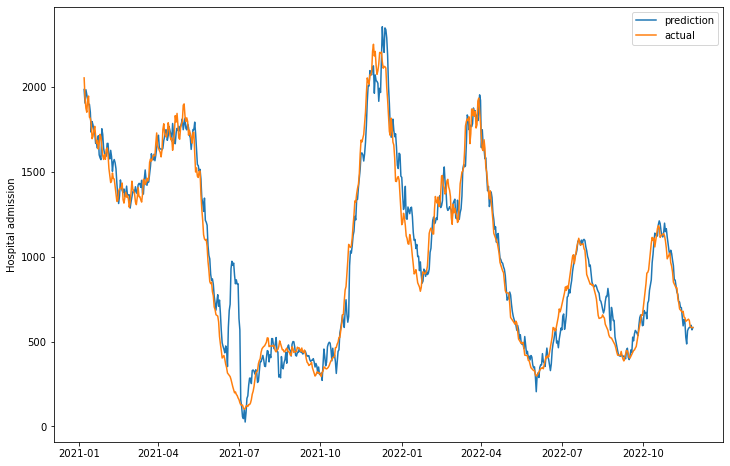

In [260]:
pred_df=pd.DataFrame(dayt)
pred_df['actual']=Y_dayinput.iloc[270+12-1:-3].values
pred_df.index=Y_dayinput.index[270+12-1:-3]
plt.figure(figsize=(12,8))
plt.plot(pred_df.iloc[:,0], label='prediction')
plt.plot(pred_df.iloc[:,1], label='actual')
plt.ylabel('Hospital admission')
plt.legend()